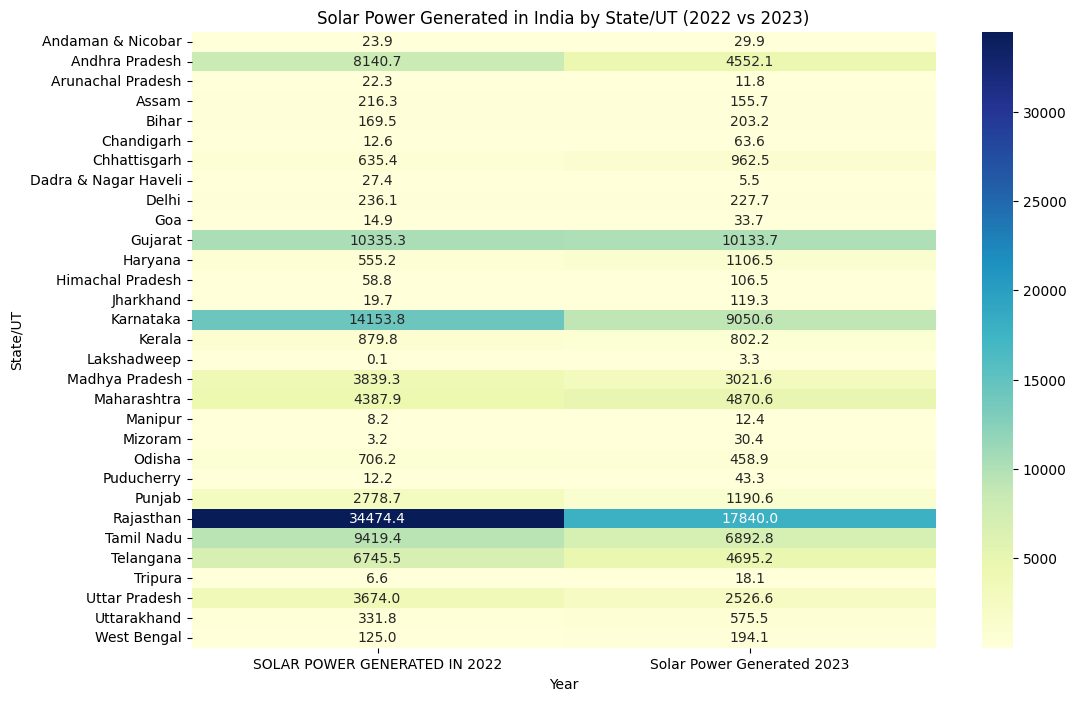

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is in a CSV file named 'solar_capacity.csv'
data = pd.read_csv('/content/solar_capacity (1).csv')

# Pivot the data to create a heatmap
heatmap_data = data.pivot_table(index='State/UT', values=['SOLAR POWER GENERATED IN 2022', 'Solar Power Generated 2023'])
# Convert columns to numeric, coercing errors to NaN
heatmap_data['SOLAR POWER GENERATED IN 2022'] = pd.to_numeric(heatmap_data['SOLAR POWER GENERATED IN 2022'], errors='coerce')
heatmap_data['Solar Power Generated 2023'] = pd.to_numeric(heatmap_data['Solar Power Generated 2023'], errors='coerce')

# Drop rows with NaN values, if any
heatmap_data.dropna(inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Solar Power Generated in India by State/UT (2022 vs 2023)')
plt.xlabel('Year')
plt.ylabel('State/UT')
plt.show()



In [ ]:
data.head()

,State/UT,Solar Power Generated 2023,SOLAR POWER GENERATED IN 2022
0,Andaman & Nicobar,29.91,23.94
1,Andhra Pradesh,4552.12,8140.72
2,Arunachal Pradesh,11.75,22.27
3,Assam,155.70,216.35
4,Bihar,203.18,169.53


In [ ]:
pip install --upgrade geopandas matplotlib pandas seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your dataset containing solar power generated by each state
data = pd.read_csv('/content/solar_capacity (1).csv')

# Load the shapefile for Indian states
india = gpd.read_file('/content/India_Country_Boundary.shp')

# Merge your dataset with the shapefile based on the 'State/UT' column
merged_data = india.merge(data, how='left', on='State/UT')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='Solar Power Generated 2023', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Solar Power Generated by State/UT in 2023')
ax.axis('off')
plt.show()



KeyError: 'State/UT'

In [ ]:
import geopandas as gpd

# Load the shapefile for Indian states
india = gpd.read_file('/content/India_Country_Boundary.shp')

# Inspect the columns
print(india.columns)


In [ ]:
import geopandas as gpd
import folium
import pandas as pd

# Load the GeoJSON file for India's states
india = gpd.read_file('https://raw.githubusercontent.com/geohacker/india/master/state/india_telengana.geojson')

# Assuming your dataset is in a CSV file named 'solar_capacity.csv'
data = pd.read_csv('/content/solar_capacity (1).csv')

# Convert 'Solar Power Generated 2023' column to numeric
data['Solar Power Generated 2023'] = pd.to_numeric(data['Solar Power Generated 2023'], errors='coerce')

# Merge the datasets on a common column
merged_data = india.merge(data, how='left', left_on='NAME_1', right_on='State/UT')

# Create a folium map centered on India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a heatmap layer
for index, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        radius=5,
        fill=True,
        fill_color='YlGnBu',
        fill_opacity=0.7,
        color='black',
        weight=0.5,
        popup=f"{row['State/UT']} - {row['Solar Power Generated 2023']}",
    ).add_to(m)

# Display the map
m.save('map.html')


Cost

In [ ]:
import pandas as pd

# Load the dataset
budget_data = pd.read_csv('/content/solar_budget (1).csv')  # Replace 'path_to_your_dataset.csv' with the actual path to your dataset

# Display the first few rows of the dataset
print(budget_data.head())

# Data Analysis
# Calculate basic statistics for each fiscal year
statistics = budget_data.describe()

# Display the basic statistics
print(statistics)


In [ ]:
import matplotlib.pyplot as plt

# Set the state column as the index
budget_data.set_index('State/UT', inplace=True)

# Plot the budget allocations for each state over the years
budget_data.T.plot(kind='line', figsize=(15, 8))
plt.title('Budget Allocations for Each State (2018-19 to 2022-23)')
plt.xlabel('Fiscal Year')
plt.ylabel('Budget Allocation')
plt.legend(title='State/UT', bbox_to_anchor=(1, 1))
plt.show()


   Unnamed: 0           State/UT  2018-19  2019-20  2020-21  2021-22  2022-23  \
0           1     Andhra Pradesh   276.17   194.04    51.49    10.48    68.96   
1           2  Arunachal Pradesh     0.00    17.01    19.76    10.54     9.30   
2           3  Andaman & Nicobar     0.00     6.77     0.35    37.97     0.00   
3           4              Assam     0.00    33.07     0.00     9.19    14.02   
4           5              Bihar     5.48     1.38     2.93     0.00     0.00   

   Solar Power Generated 2023  SOLAR POWER GENERATED IN 2022  
0                     4552.12                        8140.72  
1                       11.75                          22.27  
2                       29.91                          23.94  
3                      155.70                         216.35  
4                      203.18                         169.53  

Budget Data Statistics:
       Unnamed: 0     2018-19     2019-20     2020-21      2021-22  \
count   35.000000   35.000000   35.00000

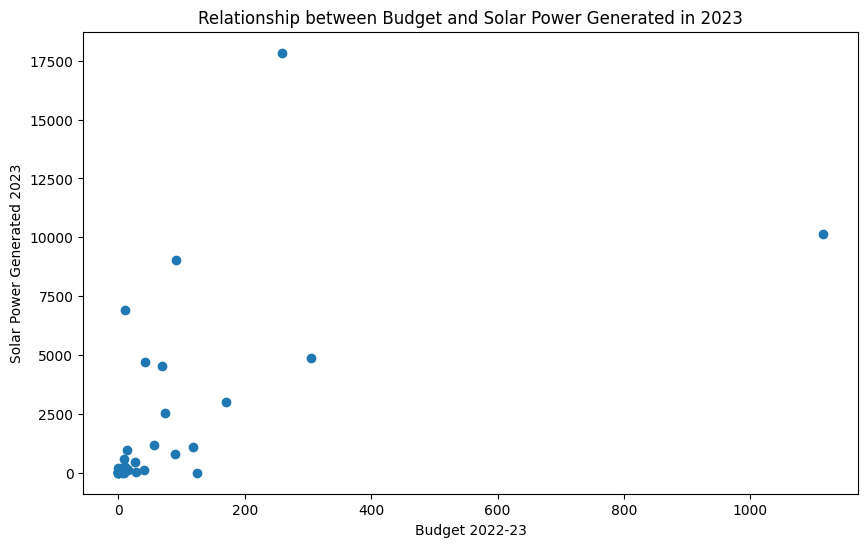

In [ ]:
import pandas as pd

# Load the statewise budget data
budget_data = pd.read_csv('/content/solar_budget (1).csv')  # Replace 'statewise_budget.csv' with the actual path to your budget dataset

# Load the statewise capacity data
capacity_data = pd.read_csv('/content/solar_capacity (1).csv')  # Replace 'statewise_capacity.csv' with the actual path to your capacity dataset

# Merge the datasets based on the common column (State/UT)
merged_data = pd.merge(budget_data, capacity_data, on='State/UT')

# Display the first few rows of the merged dataset
print(merged_data.head())

# Data Analysis
# Calculate basic statistics for budget and capacity data
budget_statistics = budget_data.describe()
capacity_statistics = capacity_data.describe()

# Display the basic statistics
print("\nBudget Data Statistics:")
print(budget_statistics)
print("\nCapacity Data Statistics:")
print(capacity_statistics)

# Perform further analysis, such as creating visualizations
# For example, you can create a scatter plot to visualize the relationship between budget and capacity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['2022-23'], merged_data['Solar Power Generated 2023'])
plt.title('Relationship between Budget and Solar Power Generated in 2023')
plt.xlabel('Budget 2022-23')
plt.ylabel('Solar Power Generated 2023')
plt.show()



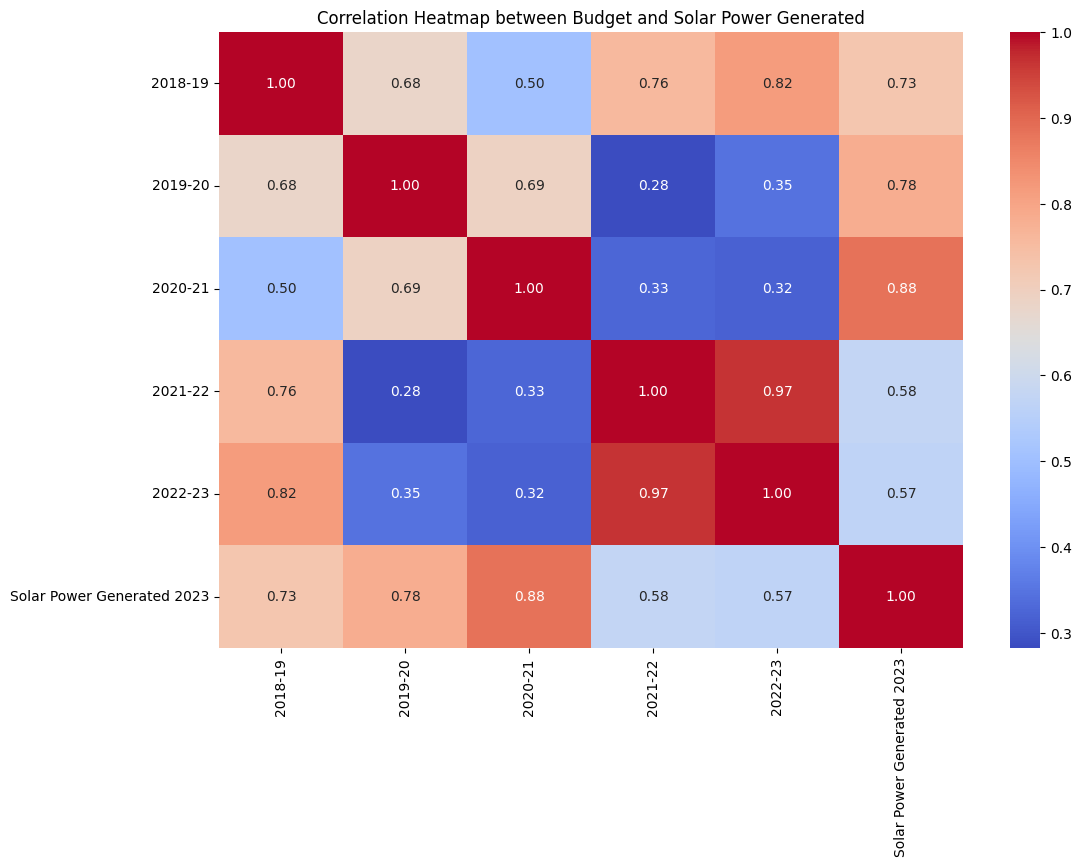

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the statewise budget data
budget_data = pd.read_csv('/content/solar_budget (1).csv')

# Load the statewise capacity data
capacity_data = pd.read_csv('/content/solar_capacity (1).csv')

# Merge the datasets based on the common column (State/UT)
merged_data = pd.merge(budget_data, capacity_data, on='State/UT')

# Create a new DataFrame with the budget and capacity data
data_for_heatmap = merged_data[['State/UT', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', 'Solar Power Generated 2023']]

# Set the state column as the index
data_for_heatmap.set_index('State/UT', inplace=True)

# Calculate the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Budget and Solar Power Generated')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is in a DataFrame called 'capacity_data'

# Ensure 'State/UT' column is categorical
capacity_data['State/UT'] = capacity_data['State/UT'].astype('category')

# Convert 'State/UT' to numerical codes
capacity_data['State/UT'] = capacity_data['State/UT'].cat.codes

# Convert 'Solar Power Generated' columns to numeric
capacity_data['Solar Power Generated 2023'] = pd.to_numeric(capacity_data['Solar Power Generated 2023'], errors='coerce')
capacity_data['SOLAR POWER GENERATED IN 2022'] = pd.to_numeric(capacity_data['SOLAR POWER GENERATED IN 2022'], errors='coerce')

# Drop rows with missing values
capacity_data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = capacity_data[capacity_data.index < 2023]

# Build and fit the ARIMA model
model = ARIMA(train_data['Solar Power Generated 2023'], order=(5,1,0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Make predictions for the next 8 years (2023-2030)
predictions = model_fit.forecast(steps=8)

# Convert the predictions to a DataFrame
predicted_data = pd.DataFrame(predictions, columns=['Solar Power Generated'])

# Add the index for the years 2023-2030
predicted_data.index += 2023

# Display the predicted data
print("Predicted Solar Power Generation (2023-2030):")
print(predicted_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

                                   SARIMAX Results                                    
Dep. Variable:     Solar Power Generated 2023   No. Observations:                   31
Model:                         ARIMA(5, 1, 0)   Log Likelihood                -292.922
Date:                        Wed, 10 Apr 2024   AIC                            597.845
Time:                                21:53:56   BIC                            606.252
Sample:                                     0   HQIC                           600.534
                                         - 31                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5478      0.446     -1.228      0.220      -1.422       0.327
ar.L2         -0.5205      0.591     -0.881      0.378      -1.678 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the solar budget dataset
solar_budget = pd.read_csv('/content/solar_budget (1).csv')

# Data Cleaning
solar_budget.dropna(inplace=True)  # Drop rows with missing values

# Feature Engineering
# No specific feature engineering is required in this simplified example

# Statistical Analysis
# Extract features (input variables) and target variable
X = solar_budget[['2018-19', '2019-20', '2020-21', '2021-22']]
y = solar_budget['2022-23']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Cost Estimation
# Example cost estimation for a new project (provide yearly budget values)
new_project_budget = pd.DataFrame({'2018-19': [50000], '2019-20': [60000], '2020-21': [70000], '2021-22': [80000]})
predicted_cost = model.predict(new_project_budget)
print("Estimated Cost for 2022-23 based on Yearly Budget:", predicted_cost[0])


Mean Squared Error: 5635.5280549100735
R-squared: 0.4069853380327473
Estimated Cost for 2022-23 based on Yearly Budget: 74878.11459847716


In [ ]:
# Cost Estimation for the next 10 years
# Create a DataFrame for the next 10 years
future_years = range(2023, 2033)
future_budgets = pd.DataFrame(index=future_years, columns=['Budget'])

# Predict the budget for each future year
for year in future_years:
    # Extract the features for the current year
    previous_years = [f'{year-4}-{year-3}', f'{year-3}-{year-2}', f'{year-2}-{year-1}', f'{year-1}-{year}']
    features = solar_budget.loc[solar_budget['State/UT'].isin(previous_years), ['2018-19', '2019-20', '2020-21', '2021-22']].values
    # If there are not enough previous years' budgets available, use the mean
    if len(features) < 4:
        features = np.mean(features, axis=0)
    # Predict the budget for the current year

# Display the predicted budgets for the next 10 years
print("Predicted Budgets for the Next 10 Years:")
print(future_budgets)


Predicted Budgets for the Next 10 Years:
     Budget
2023    NaN
2024    NaN
2025    NaN
2026    NaN
2027    NaN
2028    NaN
2029    NaN
2030    NaN
2031    NaN
2032    NaN


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = {
    'State/UT': ['Andhra Pradesh', 'Arunachal Pradesh', 'Andaman & Nicobar', 'Assam', 'Bihar', 'Chandigarh',
                 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
                 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
                 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puduchchery', 'Punjab', 'Rajasthan',
                 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
    '2018-19': [276.17, 0, 0, 0, 5.48, 18.76, 127.7, 0, 0, 417.99, 27.5, 28.05, 10.53, 33.44, 69.52, 5.5, 0, 0, 132.9,
                182.63, 0, 1.57, 0, 2.06, 35.64, 0.1, 39.54, 237.01, 2.74, 42.33, 53.15, 0, 30.93, 95.78, 11.28],
    '2019-20': [194.04, 17.01, 6.77, 33.07, 1.38, 5.13, 13.45, 0.6, 0.5, 81.19, 22.44, 8.09, 16.68, 29.79, 219.51, 0, 0, 0,
                159.33, 117.32, 16.86, 3.47, 15.33, 13.55, 30.17, 0.79, 25.94, 213.31, 0, 29.29, 54.5, 12.65, 24.86, 92.83, 15.7],
    '2020-21': [51.49, 19.76, 0.35, 0, 2.93, 0.85, 0, 23.29, 0, 101.3, 65.89, 23.43, 4.89, 31.28, 160.64, 18.46, 0, 0, 93.69,
                114.48, 23.06, 1.13, 19.73, 10.69, 4.01, 0, 31.85, 668.67, 0, 86.08, 54.03, 18.49, 8.99, 68.91, 0],
    '2021-22': [10.48, 10.54, 37.97, 9.19, 0, 0, 7.1, 26.17, 3.59, 1242.71, 175.08, 33.44, 42.26, 15.16, 141.91, 36.34, 12.41, 0,
                64.95, 95.16, 14.89, 0, 2.35, 5.86, 33.47, 0, 65.6, 305.84, 0.03, 60.92, 49.11, 16.88, 28.93, 41.9, 0],
    '2022-23': [68.96, 9.3, 0, 14.02, 0, 0.73, 13.54, 10.07, 0, 1114.65, 118.18, 15.73, 27.98, 40.64, 90.98, 89.71, 125, 0, 170.14,
                304.58, 0, 0, 1.29, 6.37, 26.7, 0, 55.93, 258.84, 0, 10.98, 42.81, 0.12, 8.33, 74.32, 4.71]
}

# Create DataFrame
solar_budget = pd.DataFrame(data)

# Cost Estimation for the next 10 years using SARIMAX model
# Selecting a state for demonstration (You can apply it to all states)
state = 'Gujarat'

# Extract the time series data for the selected state
time_series_data = solar_budget.loc[solar_budget['State/UT'] == state, ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']].values.flatten()

# Fit SARIMAX model to the data
model = SARIMAX(time_series_data, order=(1, 2, 1), seasonal_order=(2, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the next 10 years
forecast = model_fit.forecast(steps=10)

# Display the predicted budgets for the next 10 years
predicted_budgets = pd.DataFrame(forecast, columns=['Predicted Budget'], index=range(2023, 2033))
print("Predicted Budgets for the Next 10 Years:")
print(predicted_budgets)


Predicted Budgets for the Next 10 Years:
      Predicted Budget
2023        986.590000
2024        858.530000
2025        730.470000
2026        602.410000
2027        474.350000
2028        346.290000
2029        218.230000
2030        106.408084
2031       -374.689984
2032       -498.878051


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
data = {
    'State/UT': ['Andhra Pradesh', 'Arunachal Pradesh', 'Andaman & Nicobar', 'Assam', 'Bihar', 'Chandigarh',
                 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
                 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
                 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puduchchery', 'Punjab', 'Rajasthan',
                 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
    '2018-19': [276.17, 0, 0, 0, 5.48, 18.76, 127.7, 0, 0, 417.99, 27.5, 28.05, 10.53, 33.44, 69.52, 5.5, 0, 0, 132.9,
                182.63, 0, 1.57, 0, 2.06, 35.64, 0.1, 39.54, 237.01, 2.74, 42.33, 53.15, 0, 30.93, 95.78, 11.28],
    '2019-20': [194.04, 17.01, 6.77, 33.07, 1.38, 5.13, 13.45, 0.6, 0.5, 81.19, 22.44, 8.09, 16.68, 29.79, 219.51, 0, 0, 0,
                159.33, 117.32, 16.86, 3.47, 15.33, 13.55, 30.17, 0.79, 25.94, 213.31, 0, 29.29, 54.5, 12.65, 24.86, 92.83, 15.7],
    '2020-21': [51.49, 19.76, 0.35, 0, 2.93, 0.85, 0, 23.29, 0, 101.3, 65.89, 23.43, 4.89, 31.28, 160.64, 18.46, 0, 0, 93.69,
                114.48, 23.06, 1.13, 19.73, 10.69, 4.01, 0, 31.85, 668.67, 0, 86.08, 54.03, 18.49, 8.99, 68.91, 0],
    '2021-22': [10.48, 10.54, 37.97, 9.19, 0, 0, 7.1, 26.17, 3.59, 1242.71, 175.08, 33.44, 42.26, 15.16, 141.91, 36.34, 12.41, 0,
                64.95, 95.16, 14.89, 0, 2.35, 5.86, 33.47, 0, 65.6, 305.84, 0.03, 60.92, 49.11, 16.88, 28.93, 41.9, 0],
    '2022-23': [68.96, 9.3, 0, 14.02, 0, 0.73, 13.54, 10.07, 0, 1114.65, 118.18, 15.73, 27.98, 40.64, 90.98, 89.71, 125, 0, 170.14,
                304.58, 0, 0, 1.29, 6.37, 26.7, 0, 55.93, 258.84, 0, 10.98, 42.81, 0.12, 8.33, 74.32, 4.71]
}

# Create DataFrame
solar_budget = pd.DataFrame(data)

# Function to fit linear regression model and make predictions
def forecast_budget(series):
    # Extract years as features
    years = [int(year[:4]) for year in solar_budget.columns[1:]]
    X = np.array(years).reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, series)

    # Predict budgets for the next 10 years
    future_years = np.arange(years[-1] + 1, years[-1] + 11).reshape(-1, 1)
    forecast = model.predict(future_years)

    return forecast

# Predict budgets for each State/UT for the next 10 years
future_budgets = solar_budget.set_index('State/UT').apply(forecast_budget, axis=1).reset_index()
future_budgets.columns.name = None

# Display the predicted budgets
print("Predicted Budgets for the Next 10 Years:")
print(future_budgets)


SOLAR COST ESTIMATION

In [ ]:
import pandas as pd

# Load the solar capacity dataset
capacity_data = pd.read_csv('/content/solar_capacity (1).csv')

# Assuming the columns are named 'State/UT', 'Solar Power Generated 2023', and 'SOLAR POWER GENERATED IN 2022'
# Calculate the increase in capacity
capacity_data['Capacity Increase'] = capacity_data['Solar Power Generated 2023'] - capacity_data['SOLAR POWER GENERATED IN 2022']

# Define the cost per MW (in crores)
cost_per_MW_min = 4
cost_per_MW_max = 5

# Estimate the cost for each state
capacity_data['Estimated Cost (Min)'] = capacity_data['Capacity Increase'] * cost_per_MW_min
capacity_data['Estimated Cost (Max)'] = capacity_data['Capacity Increase'] * cost_per_MW_max

# Display the estimated cost for each state
print(capacity_data[['State/UT', 'Estimated Cost (Min)', 'Estimated Cost (Max)']])


In [ ]:
# Estimate the cost for each state
capacity_data['Estimated Cost (Min)'] = capacity_data['Capacity Increase'] * cost_per_MW_min
capacity_data['Estimated Cost (Max)'] = capacity_data['Capacity Increase'] * cost_per_MW_max

# Set negative estimated costs to zero
capacity_data['Estimated Cost (Min)'] = capacity_data['Estimated Cost (Min)'].apply(lambda x: max(x, 0))
capacity_data['Estimated Cost (Max)'] = capacity_data['Estimated Cost (Max)'].apply(lambda x: max(x, 0))

# Display the estimated cost for each state
print(capacity_data[['State/UT', 'Estimated Cost (Min)', 'Estimated Cost (Max)']])


In [ ]:
import pandas as pd

# Load the capacity data
capacity_data = pd.read_csv('/content/solar_capacity (1).csv')

# Assumed cost per MW (in crores)
cost_per_MW_min = 4  # Minimum estimated cost per MW
cost_per_MW_max = 5  # Maximum estimated cost per MW

# Initialize an empty DataFrame to store cost estimations
cost_estimation = []

# Calculate the cost estimation for the next 10 years
for year in range(2023, 2033):
    # Calculate the estimated cost for each state for the current year
    capacity_data[f'Estimated Cost (Min) {year}'] = capacity_data['Solar Power Generated 2023'] * cost_per_MW_min
    capacity_data[f'Estimated Cost (Max) {year}'] = capacity_data['Solar Power Generated 2023'] * cost_per_MW_max

    # Summarize the total estimated cost for all states for the current year
    total_cost_min = capacity_data[f'Estimated Cost (Min) {year}'].sum()
    total_cost_max = capacity_data[f'Estimated Cost (Max) {year}'].sum()

    # Append the total cost for the current year to the DataFrame
    cost_estimation.append({'Year': year,
                            'Total Cost (Min)': total_cost_min,
                            'Total Cost (Max)': total_cost_max})

# Convert the list of dictionaries to a DataFrame
cost_estimation_df = pd.DataFrame(cost_estimation)

# Display the cost estimation for the next 10 years
print(cost_estimation_df)
